<a href="https://colab.research.google.com/github/tshanmukh/sentiment_analysis/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sentiment analysis project

In [176]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
root_path = '/content/gdrive/My Drive/sentiment_analysis/'

## Preprocess and prepare a vocabulary

In [0]:
# Imports 
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
import plotly.offline as pyo
from string import punctuation


In [41]:
# Reading the data to a csv
# Reading the data from csv
train_csv = pd.read_csv(root_path+'dataset/train.csv')
print(len(train_csv.text))

5279


In [42]:
punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
reviews = ' '.join(list(train_csv.text))


## Creating a complete text in train csv to words

In [44]:
import string

reviews = reviews.lower() # lowercase, standardize
all_text = ''.join([c for c in reviews if c not in punctuation])

# split by new lines and spaces
reviews_split = all_text.split('\n')
all_text = ' '.join(reviews_split)

# create a list of words
words = all_text.split()
words[30:60]

['taking',
 'tysabri',
 'and',
 'feel',
 'amazing',
 'no',
 'symptoms',
 'other',
 'than',
 'dodgy',
 'color',
 'vision',
 'but',
 'i’ve',
 'had',
 'it',
 'since',
 'always',
 'so',
 'don’t',
 'know',
 'and',
 'i',
 'don’t',
 'know',
 'if',
 'it',
 'will',
 'last',
 'a']

## Removing the punctuation, hyphen, and dash

In [45]:
# imports for nltk stop words
# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table).replace('’','').replace('–','') for w in words]
print(stripped[:100])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['autoimmune', 'diseases', 'tend', 'to', 'come', 'in', 'clusters', 'as', 'for', 'gilenya', '', 'if', 'you', 'feel', 'good', 'dont', 'think', 'about', 'it', 'it', 'wont', 'change', 'anything', 'but', 'waste', 'your', 'time', 'and', 'energy', 'im', 'taking', 'tysabri', 'and', 'feel', 'amazing', 'no', 'symptoms', 'other', 'than', 'dodgy', 'color', 'vision', 'but', 'ive', 'had', 'it', 'since', 'always', 'so', 'dont', 'know', 'and', 'i', 'dont', 'know', 'if', 'it', 'will', 'last', 'a', 'month', 'a', 'year', 'a', 'decade', 'ive', 'just', 'decided', 'to', 'enjoy', 'the', 'ride', 'no', 'point', 'in', 'worrying', 'i', 'can', 'completely', 'understand', 'why', 'youd', 'want', 'to', 'try', 'it', 'but', 'results', 'reported', 'in', 'lectures', 'dont', 'always', 'stand', 'up', 'to', 'the', 'scrutiny', 'of', 'peerreview']


In [46]:
print(len(stripped))

1786150


## Removing the stop words

In [0]:
new_words = [word for word in stripped if word not in stopwords.words('english')]


In [48]:
len(new_words)

1058756

In [0]:
# vocabulary_latest = [word for word in new_words if len(word) > 2]

In [0]:
# len(vocabulary_latest)

# pickling the progress

In [0]:
import pickle

In [0]:
vocabulary = open(root_path + 'pickle/vocabulary.pickle','wb')

pickle.dump(new_words, vocabulary)

vocabulary.close()


## saved the progress of pre processing 
### Start from here

In [53]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
# Imports 
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
import plotly.offline as pyo
from string import punctuation

root_path = '/content/gdrive/My Drive/sentiment_analysis/'

In [181]:
file = open(root_path + 'pickle/vocabulary.pickle','rb')
words = pickle.load(file)
len(words), type(words)

(1058756, list)

## Tokenizing the words

In [0]:
# feel free to use this import 
from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}
int_to_vocab = {ii: word for ii, word in enumerate(vocab, 1)}


In [0]:
vocab_to_int_pickle = open(root_path  + 'pickle/vocab_to_int.pickle','wb')
int_to_vocab_pickle = open(root_path + 'pickle/int_to_vocab.pickle','wb')

pickle.dump(vocab_to_int,vocab_to_int_pickle)
pickle.dump(int_to_vocab,int_to_vocab_pickle)

vocab_to_int_pickle.close()
int_to_vocab_pickle.close()

# Functions to tokenize the raw review and label

In [183]:
# imports for nltk stop words
# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import string
def tokenize_review(review):
    
    words = review.lower().split(' ')
    table = str.maketrans('', '', string.punctuation)
    review = [w.translate(table).replace('’','').replace('–','') for w in words]
    # review = ''.join([c for c in review if c not in punctuation])
    tokens = []
    for word in review:
      
        try:
            token = vocab_to_int[word]
            # print(word, token)
        except KeyError:
            token = 0
            # print(word, token)
        tokens.append(token)
    return tokens

In [0]:

review_tokens = tokenize_review(list(train_csv.text)[0])

In [0]:
def tokenize_setiment(label):
  if label == '0' or label == 0:
    return [0, 0, 0]
  elif label == '1' or label == 1:
    return [0, 1, 0]
  elif label == '2' or label == 2:
    return [0, 0, 1]
  else:
    return None

In [187]:
tokenize_setiment(list(train_csv.sentiment)[2000])

[0, 0, 1]

## parse the review based on the drug and tokenize it

In [0]:
table = str.maketrans('', '', string.punctuation)
drugs = set([w.translate(table).replace('’','').replace('–','').lower() for w in set(train_csv.drug)])

In [0]:
from nltk.tokenize import LineTokenizer

def parse_review(review, drug, drugs_list):
  tk = LineTokenizer()
  lines = tk.tokenize(review)
  review = ''.join(lines)
  sentenses = review.lower().split('.')
  table = str.maketrans('', '', string.punctuation)
  drugs_list.remove(drug)
  drug = drug.translate(table).replace('’','').replace('–','').lower()
  token =[]
  for sentense in sentenses:
    review = set([w.translate(table).replace('’','').replace('–','') for w in sentense.split(' ') if w != ''])
    if drugs_list & review:
      continue
      # print("Not expecting", drugs_list & review, "expecting only ",drug)
    else:
      token.extend(tokenize_review(sentense))
  return token


In [190]:
print(train_csv.loc[10,'text'])
print(train_csv.loc[10,'drug'])
drugs_list = drugs.copy()
# print(len(train_csv.loc[10,'text'].split(' ')))
token = parse_review(train_csv.loc[10,'text'],train_csv.loc[10,'drug'], drugs_list)
# print(len(token))

I have no vision in one eye, unrelated to my eye injections. However, when problems began in my good eye, getting injections in that one and only eye is always a horrifying experience - mentally. It is still scary till today, you don't get used to it. I have had many eye injections. My first was when I was 43 years old, 7 years ago. I developed an eye infection, but no one could pinpoint what it exactly was. So one by one, every antibiotic was injected in the eye for a period of 6 weeks, and totalling 24 injections. It was a big relief when the last antibiotic available did the job, as there were no other options left after that. Two years later, I had cataract surgery. Within a week I developed retinal vein occlusion. Also, macular oedema came into play as well. And so began the Avasrin injections and then Lucentis. I would be getting them very frequently. And a year later, it became monthly injections. I have now stopped counting. Sometimes after an injection, it becomes pitch black 

# Creating a dataset from the train_csv

In [191]:
from tqdm import tqdm

text_dataset = []
label_dataset = []
for review in tqdm(zip(train_csv.text, train_csv.drug, train_csv.sentiment)):
  drugs_list = drugs.copy()
  text_dataset.append(parse_review(review[0],review[1].translate(table).replace('’','').replace('–','').lower(), drugs_list)) #added the preprocess for drugname
  label_dataset.append(tokenize_setiment(review[2]))

5279it [00:04, 1143.75it/s]


In [192]:
reviews_ints = text_dataset.copy()
encoded_labels = label_dataset.copy()

print('Number of reviews before removing outliers: ', len(reviews_ints))

## remove any reviews/labels with zero length from the reviews_ints list.

# get indices of any reviews with length 0
non_zero_idx = [ii for ii, review in enumerate(reviews_ints) if len(review) != 0]

# remove 0-length reviews and their labels
reviews_ints = [reviews_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of reviews after removing outliers: ', len(reviews_ints))

Number of reviews before removing outliers:  5279
Number of reviews after removing outliers:  5233


In [193]:
text_dataset, label_dataset = None, None
print(encoded_labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 0]]


# Creating a model

In [0]:
from matplotlib import pyplot as plt
import numpy as np

13488


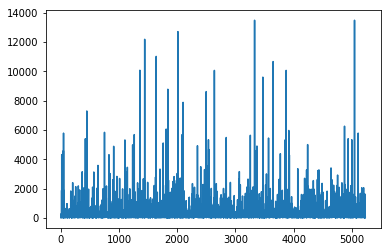

In [195]:
lengths =[]
for rev in reviews_ints:
  lengths.append(len(rev))
print(max(lengths))
%matplotlib inline
plt.plot(lengths)
plt.show()

lengths = None



In [0]:
def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)
    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features


In [197]:
seq_length = 1400

features = pad_features(reviews_ints, seq_length=seq_length)

# ## test statements - do not change - ##
# assert len(features)==len(reviews_ints), "Your features should have as many rows as reviews."
# assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 10 values of the first 30 batches 
print(features.shape)

(5233, 1400)


# Dataset split

In [198]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*0.8)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

features= None

			Feature Shapes:
Train set: 		(4186, 1400) 
Validation set: 	(523, 1400) 
Test set: 		(524, 1400)


# dataloaders and batching

In [0]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 20

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True )
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True )
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True )

In [210]:
dir(train_data)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'tensors']

In [200]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([20, 1400])
Sample input: 
 tensor([[    0,     0,     0,  ...,  2071,    62,  3941],
        [    0,     0,     0,  ...,     5,   461,    70],
        [    0,     0,     0,  ...,   577,   755,    70],
        ...,
        [    0,     0,     0,  ...,    36,     0,    70],
        [    0,     0,     0,  ...,    70, 17255,    70],
        [    0,     0,     0,  ...,   232,    70, 22236]])

Sample label size:  torch.Size([20, 3])
Sample label: 
 tensor([[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]])


# Pytorch Network

In [201]:
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
  print("Training on GPU")
else:
  print('No GPU available. Training on CPU')

Training on GPU


In [0]:

import torch.nn as nn
import torch.nn.functional as F

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Softmax(dim=1)
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # print(out.shape)
        # sigmoid function
        sig_out = self.sig(out)
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1, 3)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [203]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 3
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(53133, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3)
  (fc): Linear(in_features=256, out_features=3, bias=True)
  (sig): Softmax()
)


In [0]:
# loss and optimization functions
lr=0.001

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [207]:

# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()
    # net.to('cuda')

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        # labels = torch.tensor(labels, dtype=torch.long)
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()
        # print(inputs.shape)
        # get the output from the model
        output, h = net(inputs, h)
        # print(output.shape, labels.shape)
        # calculate the loss and perform backprop

        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])
                # labels = torch.tensor(labels, dtype=torch.long)
                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()
                    
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


RuntimeError: ignored